# Impact Of Parental Involment On their Children Academic Overall Performance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = ("/content/Parentile_Involnment_data_file.csv")
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(df.head())

   Study_Hours  School_Engagement  Screen_Time  Sleep_Quality  Exam_Anxiety  \
0            1                  5            1              4             4   
1            4                  4            2              1             2   
2            4                  2            2              1             1   
3            4                  3            4              2             5   
4            3                  1            3              4             1   

   Peer_Influence  Extracurricular_Activities  Parent_Child_Communication  \
0               2                           1                           5   
1               2                           3                           2   
2               1                           3                           2   
3               4                           3                           4   
4               1                           2                           5   

   Homework_Help  Parental_Expectations  Parental_Involvement 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Study_Hours                 600 non-null    int64
 1   School_Engagement           600 non-null    int64
 2   Screen_Time                 600 non-null    int64
 3   Sleep_Quality               600 non-null    int64
 4   Exam_Anxiety                600 non-null    int64
 5   Peer_Influence              600 non-null    int64
 6   Extracurricular_Activities  600 non-null    int64
 7   Parent_Child_Communication  600 non-null    int64
 8   Homework_Help               600 non-null    int64
 9   Parental_Expectations       600 non-null    int64
 10  Parental_Involvement        600 non-null    int64
 11  Child_Age                   600 non-null    int64
 12  Parent_Gender               600 non-null    int64
 13  Parent_Education            600 non-null    int64
 14  Parent_Occ

In [ ]:

print(df.isnull().sum())

Study_Hours                   0
School_Engagement             0
Screen_Time                   0
Sleep_Quality                 0
Exam_Anxiety                  0
Peer_Influence                0
Extracurricular_Activities    0
Parent_Child_Communication    0
Homework_Help                 0
Parental_Expectations         0
Parental_Involvement          0
Child_Age                     0
Parent_Gender                 0
Parent_Education              0
Parent_Occupation             0
Child_Stress                  0
Child_GPA                     0
dtype: int64


# Outliers Treatment

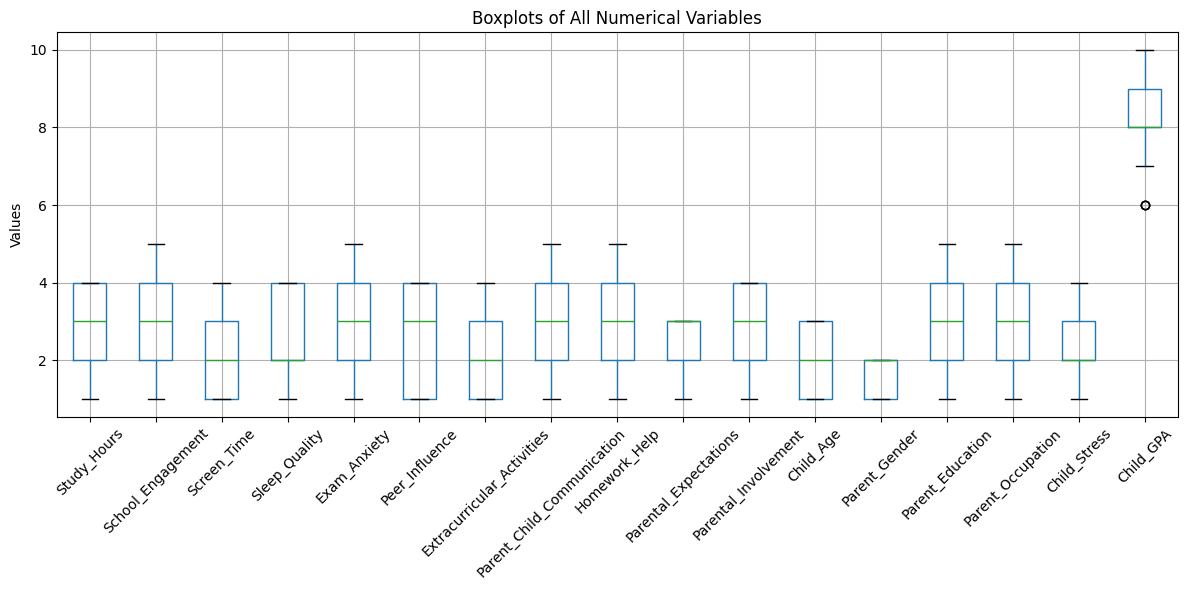

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Create boxplots for all numerical columns
df[numerical_cols].boxplot(figsize=(12, 6))
plt.title('Boxplots of All Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Child_GPA' is the column of interest
Q1 = df['Child_GPA'].quantile(0.25)
Q3 = df['Child_GPA'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df['Child_GPA'] >= lower_bound) & (df['Child_GPA'] <= upper_bound)]

print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")

Original dataset size: (600, 17)
Cleaned dataset size: (597, 17)


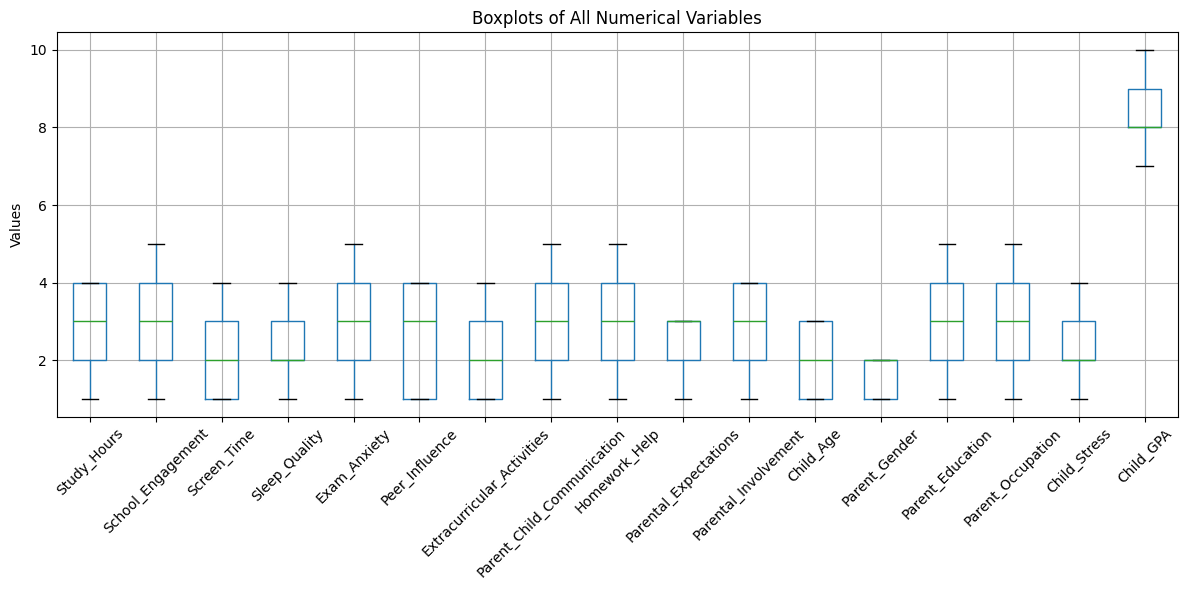

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numerical columns
numerical_cols = df_cleaned .select_dtypes(include='number').columns

# Create boxplots for all numerical columns
df_cleaned [numerical_cols].boxplot(figsize=(12, 6))
plt.title('Boxplots of All Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap


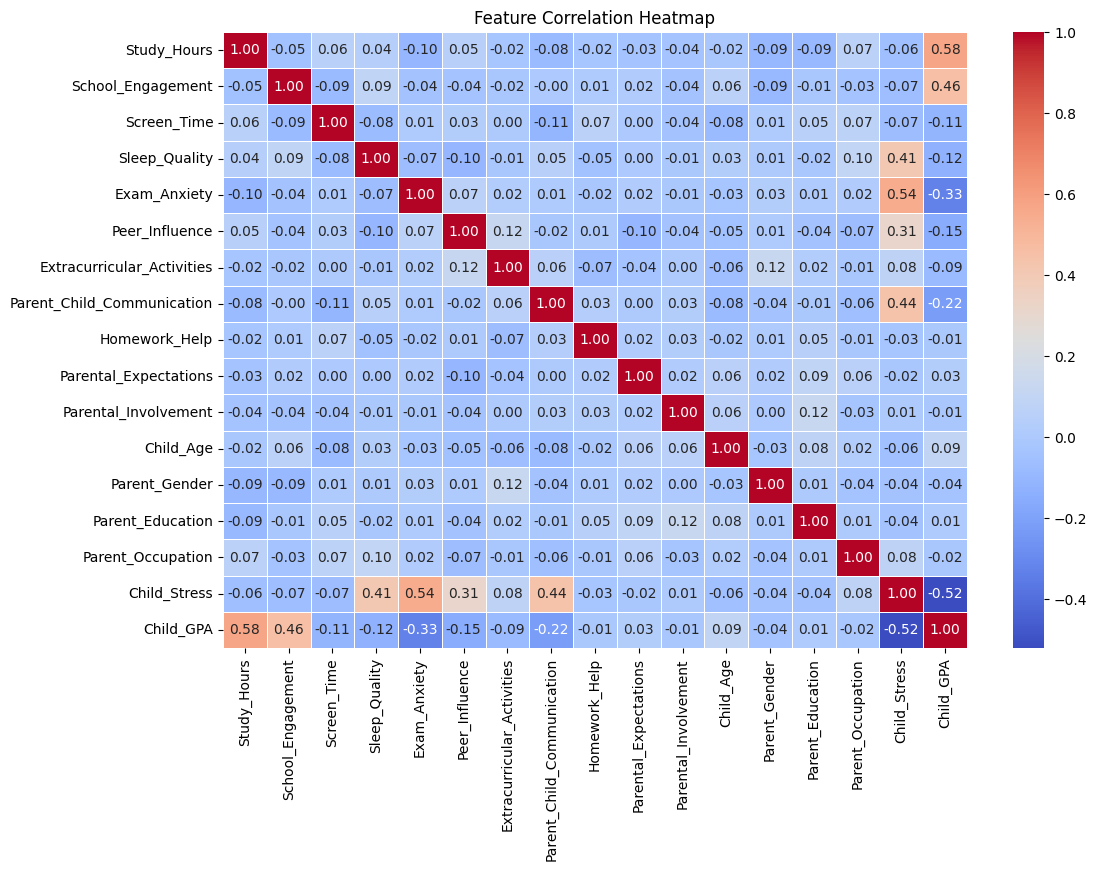

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_cleaned .corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Feature Correlation Heatmap")
plt.show()

# Association Between Independent Variables

1) Parental_Involvement and Parent_Education

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table between Parental_Involvement and Parent_Education
contingency_table = pd.crosstab(df['Parent_Education'], df['Parental_Involvement'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results


(Parental_Involvement   1   2   3   4
 Parent_Education                    
 1                     27  27  19  28
 2                     39  31  42  30
 3                     21  26  27  26
 4                     35  36  34  30
 5                     13  28  32  49,
 {'Chi2 Statistic': np.float64(25.40624115634491),
  'p-value': np.float64(0.013010890846644333),
  'Degrees of Freedom': 12,
  'Expected Frequencies': array([[22.725     , 24.91333333, 25.92333333, 27.43833333],
         [31.95      , 35.02666667, 36.44666667, 38.57666667],
         [22.5       , 24.66666667, 25.66666667, 27.16666667],
         [30.375     , 33.3       , 34.65      , 36.675     ],
         [27.45      , 30.09333333, 31.31333333, 33.14333333]])})

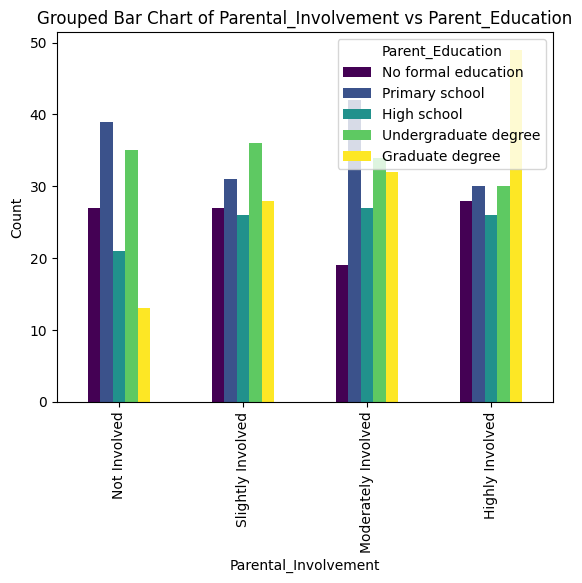

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Parental_Involvement' and 'Child_Stress' columns

# Count occurrences
cross_tab = pd.crosstab(df['Parental_Involvement'], df['Parent_Education'])

# Define custom labels for Child_Stress
Parent_Education_labels = {
    1: "No formal education",
    2: "Primary school",
    3: "High school",
    4: "Undergraduate degree",
    5: "Graduate degree"
}

# Define custom labels for Peer Influence
Involvements_labels = {
    1: "Not Involved",
    2: "Slightly Involved",
    3: "Moderately Involved",
    4: "Highly Involved"
}

# Rename index using involment  labels
cross_tab.index = cross_tab.index.map(Involvements_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Parental_Involvement vs Parent_Education')
plt.xlabel('Parental_Involvement')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [Parent_Education_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Parent_Education')

# Show plot
plt.show()

Parental involvement generally increases with education level, with graduate-educated parents showing the highest involvement and least disengagement, while other education levels display more balanced or moderate pattern

Peer_Influence and Child_Stress

In [ ]:
# Create a contingency table between Peer_Influence ad Child_Stress
contingency_table = pd.crosstab(df['Peer_Influence'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results


(Child_Stress     1    2   3   4
 Peer_Influence                 
 1               26  107  28   0
 2                9   84  38   0
 3                9   87  55   1
 4                2   73  71  10,
 {'Chi2 Statistic': np.float64(75.42423679790797),
  'p-value': np.float64(1.3030294582502068e-12),
  'Degrees of Freedom': 9,
  'Expected Frequencies': array([[12.34333333, 94.185     , 51.52      ,  2.95166667],
         [10.04333333, 76.635     , 41.92      ,  2.40166667],
         [11.65333333, 88.92      , 48.64      ,  2.78666667],
         [11.96      , 91.26      , 49.92      ,  2.86      ]])})

Conclusion: There is :statistically significant association between Peer_Influence and child stress.

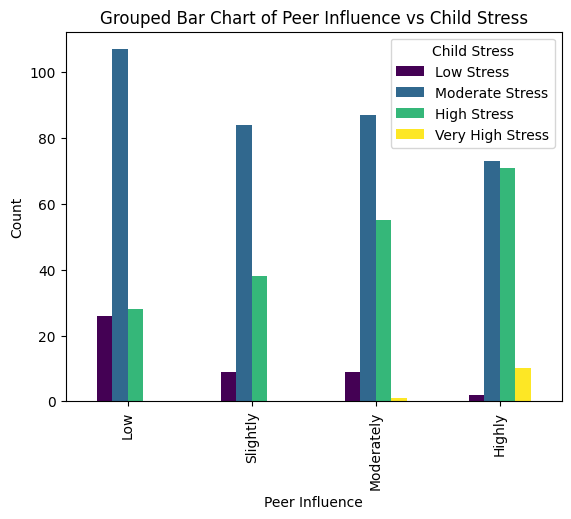

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Peer_Influence' and 'Child_Stress' columns

# Count occurrences
cross_tab = pd.crosstab(df['Peer_Influence'], df['Child_Stress'])

# Define custom labels for Child_Stress
stress_labels = {
    1: "Low Stress",
    2: "Moderate Stress",
    3: "High Stress",
    4: "Very High Stress"
}

# Define custom labels for Peer Influence
peer_labels = {
    1: "Low",
    2: "Slightly",
    3: "Moderately",
    4: "Highly"
}

# Rename index using peer influence labels
cross_tab.index = cross_tab.index.map(peer_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Peer Influence vs Child Stress')
plt.xlabel('Peer Influence')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [stress_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Child Stress')

# Show plot
plt.show()

1)Higher Peer Influence is associated with an increase in High and Very High Stress levels.

2)Moderate Stress is consistently the most frequent across all Peer Influence levels.

3)Low Stress decreases as Peer Influence increases.

4)Very High Stress only starts appearing at higher Peer Influence levels.

3) Parental_Expectations and Child_Stress

In [ ]:
contingency_table = pd.crosstab(df['Parental_Expectations'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results

(Child_Stress            1    2   3  4
 Parental_Expectations                
 1                       8   90  50  0
 2                      13   76  53  2
 3                      25  185  89  9,
 {'Chi2 Statistic': np.float64(9.460076760029411),
  'p-value': np.float64(0.14930876653916725),
  'Degrees of Freedom': 6,
  'Expected Frequencies': array([[ 11.34666667,  86.58      ,  47.36      ,   2.71333333],
         [ 11.04      ,  84.24      ,  46.08      ,   2.64      ],
         [ 23.61333333, 180.18      ,  98.56      ,   5.64666667]])})

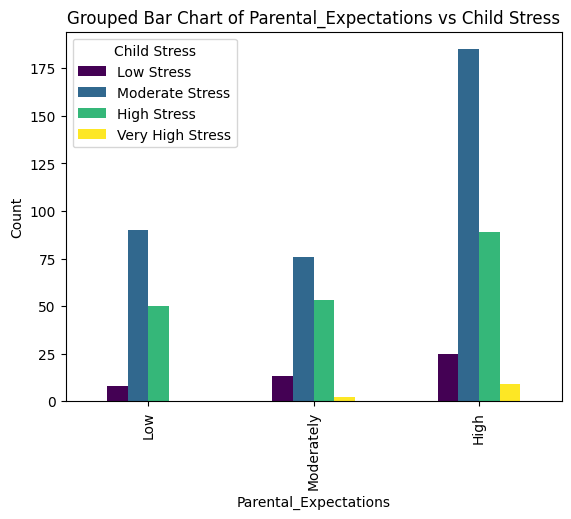

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Parental_Expectations and Child_Stress columns

# Count occurrences
cross_tab = pd.crosstab(df['Parental_Expectations'], df['Child_Stress'])

# Define custom labels for Child_Stress
stress_labels = {
    1: "Low Stress",
    2: "Moderate Stress",
    3: "High Stress",
    4: "Very High Stress"
}

# Define custom labels for Peer Influence
Expectations_labels = {
    1: "Low",
    2: "Moderately",
    3: "High"
}

# Rename index using peer influence labels
cross_tab.index = cross_tab.index.map(Expectations_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Parental_Expectations vs Child Stress')
plt.xlabel('Parental_Expectations')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [stress_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Child Stress')

# Show plot
plt.show()

1) Moderate Stress (Dark Blue) is the most common across all parental expectation levels.

2) High Stress (Teal) increases as parental expectations rise.

3) Low Stress (Purple) remains low across all expectation levels.

4) Very High Stress (Yellow) is the least common but appears more at high parental expectations.

4) Parental_Involvement and Child_Stress


In [ ]:
contingency_table = pd.crosstab(df['Parental_Involvement'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results

(Child_Stress           1   2   3  4
 Parental_Involvement               
 1                     10  80  39  6
 2                      9  93  44  2
 3                     13  89  50  2
 4                     14  89  59  1,
 {'Chi2 Statistic': np.float64(10.049950120325793),
  'p-value': np.float64(0.3464566263252637),
  'Degrees of Freedom': 9,
  'Expected Frequencies': array([[10.35      , 78.975     , 43.2       ,  2.475     ],
         [11.34666667, 86.58      , 47.36      ,  2.71333333],
         [11.80666667, 90.09      , 49.28      ,  2.82333333],
         [12.49666667, 95.355     , 52.16      ,  2.98833333]])})

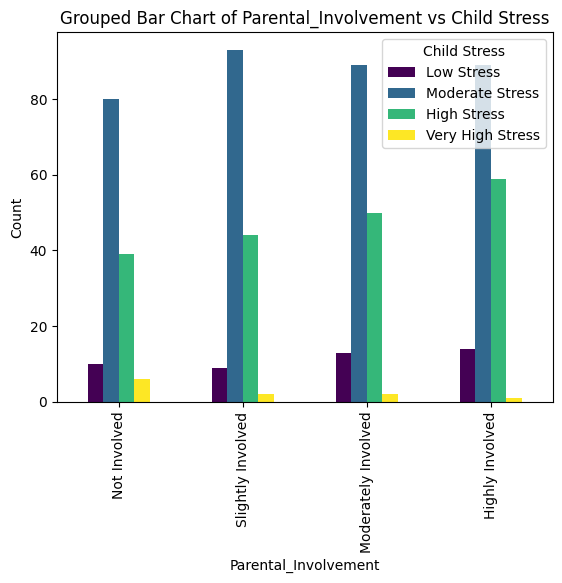

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Parental_Involvement' and 'Child_Stress' columns

# Count occurrences
cross_tab = pd.crosstab(df['Parental_Involvement'], df['Child_Stress'])

# Define custom labels for Child_Stress
stress_labels = {
    1: "Low Stress",
    2: "Moderate Stress",
    3: "High Stress",
    4: "Very High Stress"
}

Involvements_labels = {
    1: "Not Involved",
    2: "Slightly Involved",
    3: "Moderately Involved",
    4: "Highly Involved"
}

# Rename index using
cross_tab.index = cross_tab.index.map(Involvements_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Parental_Involvement vs Child Stress')
plt.xlabel('Parental_Involvement')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [stress_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Child Stress')

# Show plot
plt.show()

1) Moderate Stress (Dark Blue) is the most common stress level across all parental involvement categories.

2) High Stress (Green) follows as the second most common stress level.

3) Low Stress (Dark Purple) and Very High Stress (Yellow) are the least frequent.

4) As parental involvement increases, High Stress (Green) also increases slightly.

5) Parent_Child_Communication and Child_Stress

In [ ]:
contingency_table = pd.crosstab(df['Parent_Child_Communication'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results

(Child_Stress                 1   2   3  4
 Parent_Child_Communication               
 1                           32  84  18  0
 2                            4  88  21  0
 3                            9  75  35  0
 4                            1  54  48  5
 5                            0  50  70  6,
 {'Chi2 Statistic': np.float64(146.87805569383943),
  'p-value': np.float64(2.434794901470242e-25),
  'Degrees of Freedom': 12,
  'Expected Frequencies': array([[10.27333333, 78.39      , 42.88      ,  2.45666667],
         [ 8.66333333, 66.105     , 36.16      ,  2.07166667],
         [ 9.12333333, 69.615     , 38.08      ,  2.18166667],
         [ 8.28      , 63.18      , 34.56      ,  1.98      ],
         [ 9.66      , 73.71      , 40.32      ,  2.31      ]])})

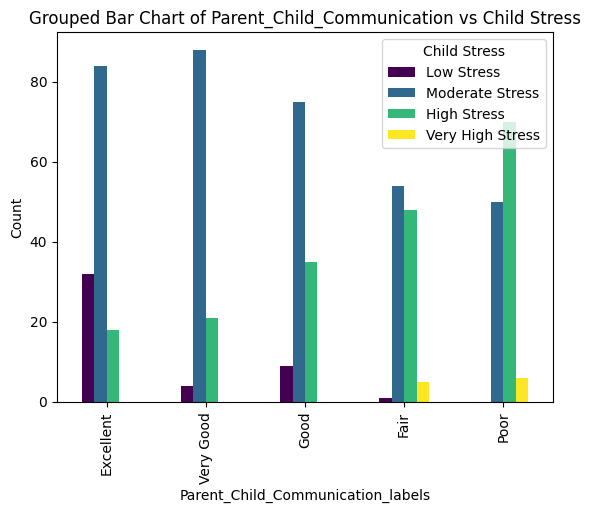

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Parental_Involvement' and 'Child_Stress' columns

# Count occurrences
cross_tab = pd.crosstab(df['Parent_Child_Communication'], df['Child_Stress'])

# Define custom labels for Child_Stress
stress_labels = {
    1: "Low Stress",
    2: "Moderate Stress",
    3: "High Stress",
    4: "Very High Stress"
}

# Define custom labels for Peer Influence
Parent_Child_Communication_labels = {
    5: "Poor",
    4: "Fair",
    3: "Good",
    2: "Very Good",
    1: "Excellent"
}

# Rename index using peer influence labels
cross_tab.index = cross_tab.index.map(Parent_Child_Communication_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Parent_Child_Communication vs Child Stress')
plt.xlabel('Parent_Child_Communication_labels')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [stress_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Child Stress')

# Show plot
plt.show()

1) Better communication (Excellent & Very Good) is associated with more Moderate Stress (Dark Blue) and less High Stress (Green).

2) As communication quality declines (moving from "Good" to "Fair" to "Poor"), the number of children experiencing High Stress (Green) increases significantly.

3) Poor communication has the highest number of High-Stress cases, even surpassing Moderate Stress in some instances.

4) Low Stress (Dark Purple) is more common in children with excellent communication, while very high stress (Yellow) is more frequent in children with poor communication.

6) Exam_Anxiety and Child_Stress

In [ ]:
contingency_table = pd.crosstab(df['Exam_Anxiety'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results

(Child_Stress   1   2   3  4
 Exam_Anxiety               
 1             30  86   4  0
 2             13  85  21  0
 3              3  80  17  0
 4              0  49  72  2
 5              0  51  78  9,
 {'Chi2 Statistic': np.float64(225.95095467673013),
  'p-value': np.float64(1.382259627754331e-41),
  'Degrees of Freedom': 12,
  'Expected Frequencies': array([[ 9.2       , 70.2       , 38.4       ,  2.2       ],
         [ 9.12333333, 69.615     , 38.08      ,  2.18166667],
         [ 7.66666667, 58.5       , 32.        ,  1.83333333],
         [ 9.43      , 71.955     , 39.36      ,  2.255     ],
         [10.58      , 80.73      , 44.16      ,  2.53      ]])})

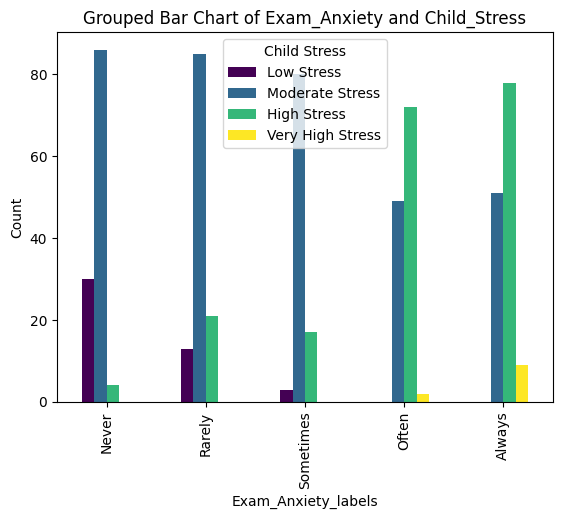

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined with 'Exam_Anxiety' and 'Child_Stress' columns

# Count occurrences
cross_tab = pd.crosstab(df['Exam_Anxiety'], df['Child_Stress'])

# Define custom labels for Child_Stress
stress_labels = {
    1: "Low Stress",
    2: "Moderate Stress",
    3: "High Stress",
    4: "Very High Stress"
}

# Define custom labels for Peer Influence
Exam_Anxiety_labels = {
    1: "Never",
    2: "Rarely",
    3: "Sometimes",
    4: "Often",
    5: "Always"
}

# Rename index using peer influence labels
cross_tab.index = cross_tab.index.map(Exam_Anxiety_labels)

# Plot Grouped Bar Chart
ax = cross_tab.plot(kind='bar', stacked=False, colormap='viridis')

# Customizing the plot
plt.title('Grouped Bar Chart of Exam_Anxiety and Child_Stress')
plt.xlabel('Exam_Anxiety_labels')
plt.ylabel('Count')

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()
labels = [stress_labels[int(label)] for label in labels]  # Map numbers to descriptions
plt.legend(handles, labels, title='Child Stress')

# Show plot
plt.show()

1) Children with little to no exam anxiety ("Never" and "Rarely") mostly experience Moderate Stress (Dark Blue), with some experiencing Low Stress (Dark Purple).

2) As exam anxiety increases ("Sometimes" to "Often" to "Always"), High Stress (Green) and Very High Stress (Yellow) become significantly more prevalent.

3) In the "Always" category (highest exam anxiety), High Stress surpasses Moderate Stress, indicating a strong correlation between frequent exam anxiety and higher stress levels.

4) Very High Stress (Yellow) is rare but becomes more visible at higher anxiety levels.

Parent_Occupation and Child_Stress

In [ ]:
contingency_table = pd.crosstab(df['Parent_Occupation'], df['Child_Stress'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Prepare the results
association_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

contingency_table, association_results

(Child_Stress        1   2   3  4
 Parent_Occupation               
 1                   9  61  36  0
 2                  16  93  47  4
 3                  13  64  28  5
 4                   4  60  35  1
 5                   4  73  46  1,
 {'Chi2 Statistic': np.float64(19.77908753864853),
  'p-value': np.float64(0.07138198951673867),
  'Degrees of Freedom': 12,
  'Expected Frequencies': array([[ 8.12666667, 62.01      , 33.92      ,  1.94333333],
         [12.26666667, 93.6       , 51.2       ,  2.93333333],
         [ 8.43333333, 64.35      , 35.2       ,  2.01666667],
         [ 7.66666667, 58.5       , 32.        ,  1.83333333],
         [ 9.50666667, 72.54      , 39.68      ,  2.27333333]])})

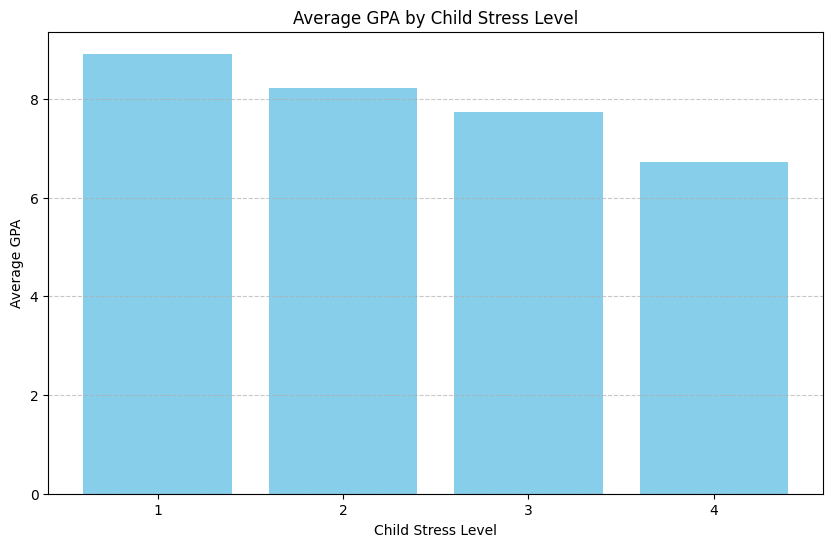

In [ ]:
# Calculate mean GPA for each stress level
mean_gpa_by_stress = df.groupby('Child_Stress')['Child_GPA'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_gpa_by_stress['Child_Stress'], mean_gpa_by_stress['Child_GPA'], color='skyblue')
plt.title('Average GPA by Child Stress Level')
plt.xlabel('Child Stress Level')
plt.ylabel('Average GPA')
plt.xticks(mean_gpa_by_stress['Child_Stress'])  # Ensure all stress levels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


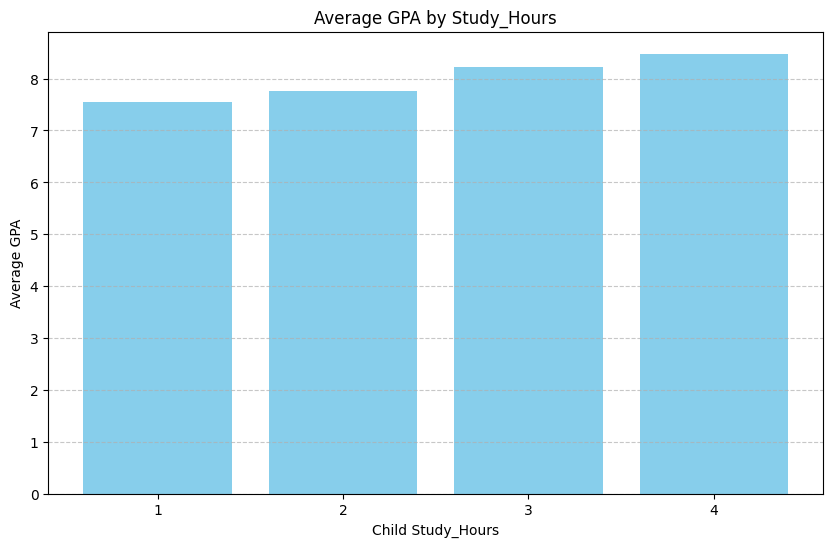

In [ ]:
# Calculate mean GPA for each Study Hour

mean_gpa_by_Study_Hours = df.groupby('Study_Hours')['Child_GPA'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_gpa_by_Study_Hours['Study_Hours'], mean_gpa_by_Study_Hours['Child_GPA'], color='skyblue')
plt.title('Average GPA by Study_Hours')
plt.xlabel('Child Study_Hours')
plt.ylabel('Average GPA')
plt.xticks(mean_gpa_by_Study_Hours['Study_Hours'])  # Ensure all stress levels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Linear Regression model for child GPA**



In [ ]:


# Define independent variables (X) and dependent variable (y)
# Assume 'CGPA' as target variable, modify if required
X = df.drop(columns=['Child_GPA'])  # Drop target column
y = df['Child_GPA']  # Target variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the number of observations and predictors
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Prepare model coefficients and intercept
model_results = {
    "MSE": mse,
    "R-squared": r2,
    "Adjusted R-squared": adjusted_r2,
    "Model Coefficients": model.coef_,
    "Model Intercept": model.intercept_
}

model_results

{'MSE': 0.10138509124837868,
 'R-squared': 0.7190251512747011,
 'Adjusted R-squared': 0.6753785728319363,
 'Model Coefficients': array([ 0.3234245 ,  0.20991888, -0.07774185,  0.01351772,  0.00938304,
        -0.00083504, -0.02720254,  0.0224216 , -0.0079599 ,  0.01901932,
         0.00432253,  0.02583397,  0.06891875,  0.03039982,  0.00737394,
        -0.53187099]),
 'Model Intercept': np.float64(7.591186562953287)}

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Combine X and y into one DataFrame (assuming your X is a DataFrame)
df_model = X.copy()
df_model['Child_GPA'] = y

# Define the formula for regression (e.g., using all predictors)
# Adjust 'Child_GPA ~ ' part if you want specific features only
formula = 'Child_GPA ~ ' + ' + '.join(X.columns)

# Fit OLS model
model = ols(formula, data=df_model).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)  # type II ANOVA
print(anova_table)

                               sum_sq     df           F         PR(>F)
Study_Hours                 86.237687    1.0  992.385416  5.928751e-128
School_Engagement           48.909034    1.0  562.823672   1.355422e-87
Screen_Time                  4.438523    1.0   51.076574   2.665989e-12
Sleep_Quality                0.008598    1.0    0.098937   7.532218e-01
Exam_Anxiety                 0.010863    1.0    0.125003   7.237981e-01
Peer_Influence               0.005411    1.0    0.062262   8.030431e-01
Extracurricular_Activities   0.287036    1.0    3.303082   6.966321e-02
Parent_Child_Communication   0.094329    1.0    1.085500   2.979022e-01
Homework_Help                0.006408    1.0    0.073739   7.860649e-01
Parental_Expectations        0.099403    1.0    1.143887   2.852750e-01
Parental_Involvement         0.117481    1.0    1.351923   2.454179e-01
Child_Age                    0.272728    1.0    3.138434   7.698951e-02
Parent_Gender                0.432422    1.0    4.976128   2.607

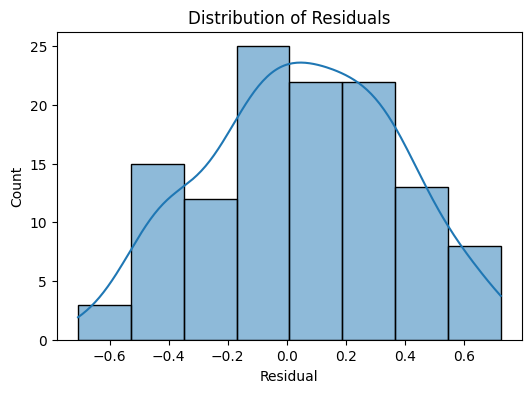

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residuals
residuals = y_test - y_pred



# Plot: Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Combine X and y into one DataFrame (assuming your X is a DataFrame)
df_model = X.copy()
df_model['Child_GPA'] = y

# Define the formula for regression (e.g., using all predictors)
# Adjust 'Child_GPA ~ ' part if you want specific features only
formula = 'Child_GPA ~ ' + ' + '.join(X.columns)

# Fit OLS model
model = ols(formula, data=df_model).fit()


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Add a constant to X for intercept
X_with_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_with_const).fit()

# Print F-statistic and corresponding p-value
print("F-statistic:", model.fvalue)
print("p-value:", model.f_pvalue)

# Optional: full summary
print(model.summary())

F-statistic: 155.94973443092252
p-value: 2.0395086845512574e-198
                            OLS Regression Results                            
Dep. Variable:              Child_GPA   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          2.04e-198
Time:                        08:50:18   Log-Likelihood:                -109.84
No. Observations:                 600   AIC:                             253.7
Df Residuals:                     583   BIC:                             328.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

# Classification Model for Child stress

In [ ]:
pip install pandas scikit-learn numpy

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.56      0.50         9
           2       0.84      0.83      0.83        70
           3       0.82      0.82      0.82        39
           4       1.00      0.50      0.67         2

    accuracy                           0.80       120
   macro avg       0.78      0.68      0.71       120
weighted avg       0.81      0.80      0.80       120



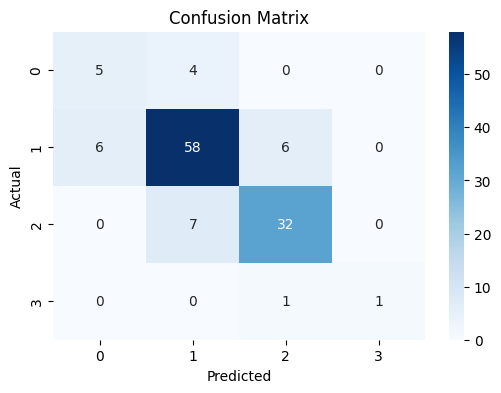

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




# Define features and target
X = df.drop('Child_Stress', axis=1)
y = df['Child_Stress']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



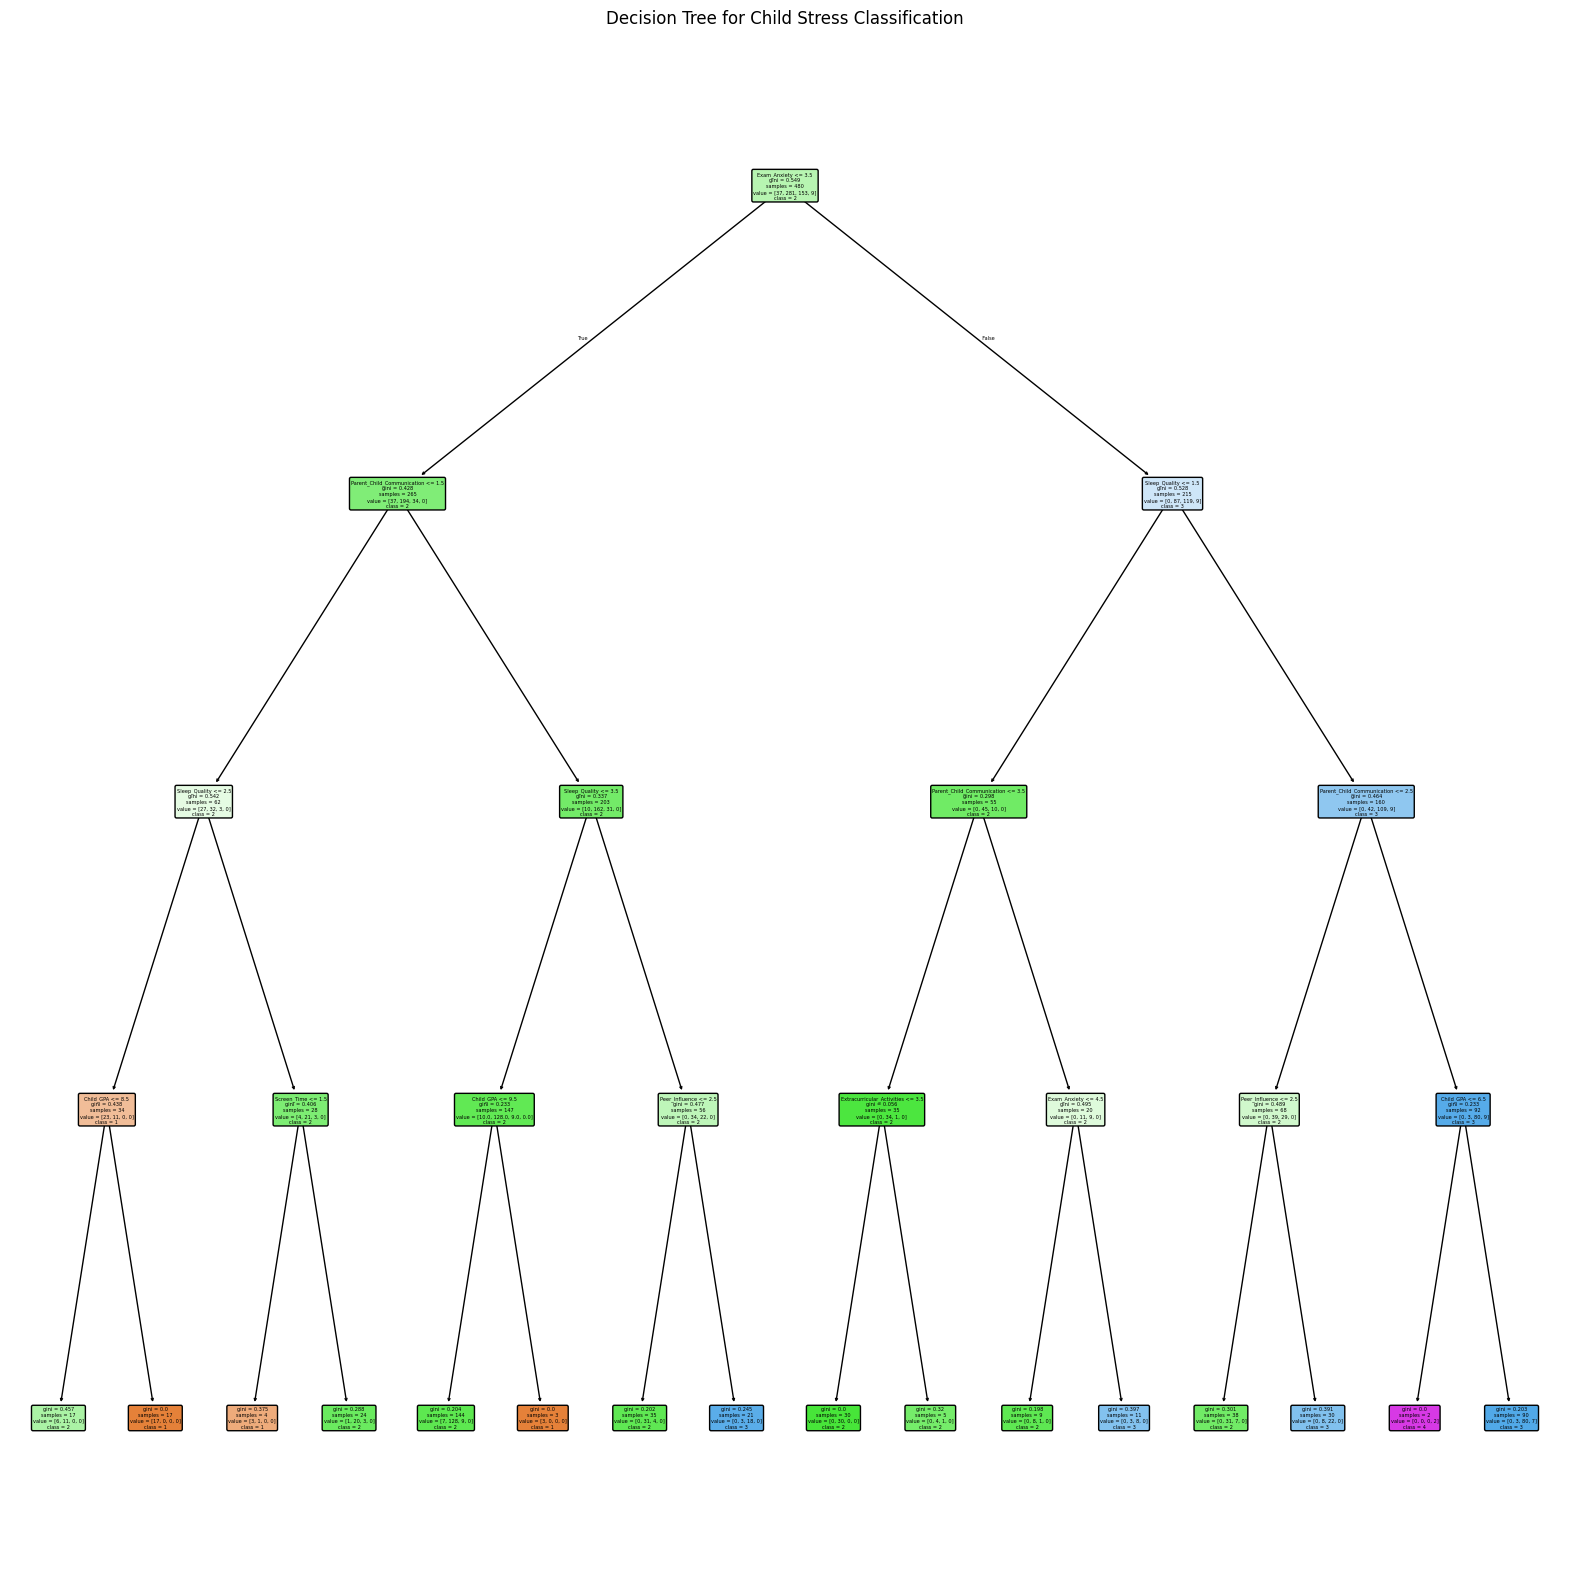

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns, class_names=sorted(y.unique().astype(str)), filled=True, rounded=True)
plt.title("Decision Tree for Child Stress Classification")
plt.show()

In [ ]:
Child GPA: Lower academic performance can increase stress.

Sleep Time: Not just quality, but how much sleep the child gets matters.

Peer Influence and Extra Activities also have minor roles.